# Some Math Background

Manipulating numbers, scalars, vectors, and matrices lies at the heart of most machine learning approaches.

In this pairs of introductory notebooks, you need some basic algebra and geometry background.  You will add to what you know by:

* Learning what are and how to represent scalars, vectors, and matrices

* Developing a geometric intuition of what’s going on beneath the hood of machine learning algorithms.

* Grasping how numpy works and how we can use it in the design of machine learning algorithms

Through the course of these 2 notebooks, you will come to know what is meant by tensors -- from whose name Google's Tensorflow is derived.

<a href="https://collab.research.google.com/github/philmui/study-algorithmic-bias/blob/main/notebooks/01a_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1: Representing Algebra



### Graphing algebra

Let's start with a familiar algebra problem.

> After robbing a bank, a robber took off in a car that travels at 2.5 kilometer per minute.  5 minutes after the robber took off, the police arrived at the bank and instantly chased after the robber at 3 kilometer per minute.  
> Would the sheriff be able to catch up with the robber?  If so, how many minutes after the robber took off would the sheriff caught up, and at what kilometer distance away from the bank would both of them be at that time?  

Before we continue, please feel free to solve this problem on paper -- ideally with 2 line graphs showing the intersections.  

* Let `x` be the time (`t`) by minutes passed since the robber took off.
* Let `y` be the distance (`d`) that either has traveled away from the bank.
    * `d_r` = distance traveled by the robber
    * `d_s` = distance traveled by the sheriff

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t = np.linspace(0, 40, 1000) # start, finish, n points

Distance travelled by robber: $d = 2.5t$

In [4]:
t.shape

(1000,)

In [5]:
t[:10]

array([0.        , 0.04004004, 0.08008008, 0.12012012, 0.16016016,
       0.2002002 , 0.24024024, 0.28028028, 0.32032032, 0.36036036])

In [6]:
d_r = 2.5 * t 

Distance travelled by sheriff: $d = 3(t-5)$

In [7]:
d_s = 3 * (t-5)

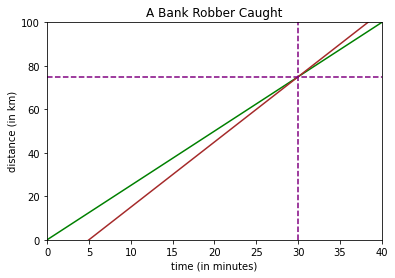

In [8]:
fig, ax = plt.subplots()
plt.title('A Bank Robber Caught')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in km)')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

So now it is clear by the graph intersection that 30 minutes after the robber took off, he will be caught by the sheriff a distance nearly 80 km away.

### Python Types

In [9]:
x = 25
x

25

In [11]:
type(x)

int

In [12]:
y = 3

In [13]:
py_sum = x + y
py_sum

28

In [14]:
type(py_sum)

int

In [15]:
x_float = 25.0
float_sum = x_float + yfloat_sum

28.0

In [16]:
type(float_sum)

float

### Scalars, Vectors, Matrices, Tensors

Scalars are numbers or single variables

Vectors are multivariate representation of an ordered set of numbers or variables

Matrics are 2-dimensional vectors

A tensor is an algebraic object that describes a (multilinear) relationship between sets of algebraic objects related to a vector space. 

PyTorch and TensorFlow are the two most popular ML libraries in Python, itself the most popular programming language in ML
Both support a generalization of "arrays" called "tensors" (arrays in multiple dimensions very well).  Tensors are very common data structures used for training deep learning neural networks.
  * scalars : tensor of rank 0
  * 1D arrays or vectors : tensor of rank 1
  * 2D arrays or matrics : tensor of rank 2
  * ...

### PyTorch

* PyTorch tensors are designed to be pythonic, i.e., to feel and behave like NumPy arrays
* The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU (see [here](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html) for example) 
* Documentation on PyTorch tensors, including available data types, is [here](https://pytorch.org/docs/stable/tensors.html)

In [18]:
import torch

In [19]:
x_pt = torch.tensor(25) # type specification optional, e.g.: dtype=torch.float16
x_pt

tensor(25)

In [20]:
x_pt.shape

torch.Size([])

In [23]:
vec = torch.tensor([1, 2, 3])
vec

tensor([1, 2, 3])

In [24]:
vec.shape

torch.Size([3])

In [27]:
mat = torch.tensor([[1,2,3], [1,2,3], [1,2,3], [1,2,3]])

In [28]:
mat.shape

torch.Size([4, 3])

### TensorFlow

Tensors created with a wrapper, all of which [you can read about here](https://www.tensorflow.org/guide/tensor):  

* `tf.Variable`
* `tf.constant`
* `tf.placeholder`
* `tf.SparseTensor`

Most widely-used is `tf.Variable`, which we'll use here. 

As with TF tensors, in PyTorch we can similarly perform operations, and we can easily convert to and from NumPy arrays

Also, a full list of tensor data types is available [here](https://www.tensorflow.org/api_docs/python/tf/dtypes/DType).

In [29]:
import tensorflow as tf

In [30]:
x_tf = tf.Variable(25, dtype=tf.int16) # dtype is optional
x_tf

<tf.Variable 'Variable:0' shape=() dtype=int16, numpy=25>

In [31]:
x_tf.shape

TensorShape([])

In [32]:
y_tf = tf.Variable(3, dtype=tf.int16)

In [33]:
x_tf + y_tf

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [34]:
tf_sum = tf.add(x_tf, y_tf)
tf_sum

<tf.Tensor: shape=(), dtype=int16, numpy=28>

In [35]:
tf_sum.numpy() # note that NumPy operations automatically convert tensors to NumPy arrays, and vice versa

28

In [36]:
type(tf_sum.numpy())

numpy.int16

In [37]:
tf_float = tf.Variable(25., dtype=tf.float16)
tf_float

<tf.Variable 'Variable:0' shape=() dtype=float16, numpy=25.0>

Let's add a few higher (rank) dimensional tensors.

### Vectors (Rank 1 Tensors) in NumPy

In [38]:
x = np.array([25, 2, 5]) # type argument is optional, e.g.: dtype=np.float16
x

array([25,  2,  5])

In [39]:
len(x)

3

In [40]:
x.shape

(3,)

In [41]:
type(x)

numpy.ndarray

In [42]:
x[0] # zero-indexed

25

In [43]:
type(x[0])

numpy.int64

### Vector Transposition

In [44]:
# Transposing a regular 1-D array has no effect...
x_t = x.T
x_t

array([25,  2,  5])

In [45]:
x_t.shape

(3,)

In [46]:
# ...but it does we use nested "matrix-style" brackets: 
y = np.array([[25, 2, 5]])
y

array([[25,  2,  5]])

In [47]:
y.shape

(1, 3)

In [48]:
# ...but can transpose a matrix with a dimension of length 1, which is mathematically equivalent: 
y_t = y.T
y_t

array([[25],
       [ 2],
       [ 5]])

In [49]:
y_t.shape # this is a column vector as it has 3 rows and 1 column

(3, 1)

In [50]:
# Column vector can be transposed back to original row vector: 
y_t.T 

array([[25,  2,  5]])

In [51]:
y_t.T.shape

(1, 3)

### Zero Vectors

Have no effect if added to another vector

In [52]:
z = np.zeros(3) 
z

array([0., 0., 0.])

In [53]:
z.shape

(3,)

In [56]:
z1 = np.array([np.zeros(3)])

In [57]:
z1.shape

(1, 3)

In [58]:
z1

array([[0., 0., 0.]])

In [59]:
z1.T

array([[0.],
       [0.],
       [0.]])

In [60]:
z1.shape

(1, 3)

### Vector and Matrix

What is the shape of the array (or vector)? `np.array([1,2,3])`

In [97]:
v = np.array([1,2,3])
v

array([1, 2, 3])

In [98]:
v.shape

(3,)

This is a vector of length 3.  But as a 2D matrix, the 2nd dimension is not explicitly defined and has no value according to numpy.

We can explicitly create a matrix with well defined rows and columns:

In [100]:
m = np.array([[1,2,3]])
m

array([[1, 2, 3]])

The interesting question to ask is: is this a "row vector" or a "column vector"?  For numpy: this additional bracket creates a "row vector"

In [101]:
m.shape

(1, 3)

To convert this row vector to a column vector of shape (3,1), we need to do a matrix _transposition_.

In [102]:
m.T

array([[1],
       [2],
       [3]])

In [103]:
m.T.shape

(3, 1)

### Vector and Matrix Concaternation

If we want to concaternate to the 1st dimension of the vector v, here is a conveience function to do that: `np.r_`

In [113]:
np.r_[np.array([1,2,3]), np.array([4,5,6])]

array([1, 2, 3, 4, 5, 6])

In [115]:
np.r_[np.array([1,2,3]), 0, 0, np.array([4,5,6])]

array([1, 2, 3, 0, 0, 4, 5, 6])

By default, np.r_ adds vectors along their "first axis" -- which in this case is the only axis for all vectors.  Scalars are converted to a 1x1 vector.  Arrays are convered to 3x1 vectors.  So np.r_ adds the vectors along the ***first dimension*** : which is the "row" dimension or explicitly as 'r':

In [124]:
m = np.r_['r', np.array([1,2,3]), 0, 0, np.array([4,5,6])]
m

matrix([[1, 2, 3, 0, 0, 4, 5, 6]])

In [125]:
m.shape

(1, 8)

We can also specify the concaternation to be done along the ***last dimension*** : which is the "column" dimension or 'c'.  In this case, all of the np.arrays are convered to nx1 vectors:

In [126]:
mr = np.r_['c', np.array([1,2,3]), 0, 0, np.array([4,5,6])]
mr

matrix([[1],
        [2],
        [3],
        [0],
        [0],
        [4],
        [5],
        [6]])

In [127]:
mr.shape

(8, 1)

If we want to conceternate the array / vectors along the ***last dimension***.  Arrays have only 1 dimension.  So we mentally add one: so shape of both array becomes (3,1).

So resultant shape would be (3,1+1) which is (3,2). which is the shape of result.

There is a convenience method np.c_ that does the trick.

In [140]:
mc = np.c_[np.array([1,2,3]), np.array([4,5,6])]
mc

array([[1, 4],
       [2, 5],
       [3, 6]])

In [141]:
mc.shape

(3, 2)

Another example:

`np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]`

shapes:

`np.array([[1,2,3]])` = 1,3

`np.array([[4,5,6]])` = 1,3

For scalars such as 0 so we can think of it as [[0]] = 1,1

So result 1,3+1+1+3 = 1,8

which should be the shape of result : array([[1, 2, 3, 0, 0, 4, 5, 6]])


In [143]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

In [144]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])].shape

(1, 8)

So, how do we stack "rows" of vectors along the first dimension of the rows?  We need to specific the array conversion to vectors as extending along the 2nd column dimension: which is 1x2 but arrays have no first dimension, and this is the same as '0x2' or '0,2':

In [138]:
mr2 = np.r_['0,2', np.array([1,2,3]), np.array([4,5,6])]
mr2

array([[1, 2, 3],
       [4, 5, 6]])

In [139]:
mr2.shape

(2, 3)

### Vectors in PyTorch and TensorFlow

In [63]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [65]:
x_pt.T

tensor([25,  2,  5])

In [66]:
x1_pt = torch.tensor([[25, 2, 5]])
x1_pt

tensor([[25,  2,  5]])

In [67]:
x1_pt.T

tensor([[25],
        [ 2],
        [ 5]])

In [68]:
x_tf = tf.Variable([25, 2, 5])
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

In [69]:
x_tf.shape

TensorShape([3])

In [70]:
x1_tf = tf.Variable([[25, 2, 5]])
x1_tf

<tf.Variable 'Variable:0' shape=(1, 3) dtype=int32, numpy=array([[25,  2,  5]], dtype=int32)>

In [71]:
x1_tf.shape

TensorShape([1, 3])

### $L^2$ Norm

In [72]:
x

array([25,  2,  5])

In [73]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [74]:
np.linalg.norm(x)

25.573423705088842

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

### $L^1$ Norm

In [45]:
x

array([25,  2,  5])

In [46]:
np.abs(25) + np.abs(2) + np.abs(5)

32

### Squared $L^2$ Norm

In [47]:
x

array([25,  2,  5])

In [48]:
(25**2 + 2**2 + 5**2)

654

In [49]:
# we'll cover tensor multiplication more soon but to prove point quickly: 
np.dot(x, x)

654

### Max Norm

In [50]:
x

array([25,  2,  5])

In [51]:
np.max([np.abs(25), np.abs(2), np.abs(5)])

25

### Orthogonal Vectors

Vectors x and y are "orthogonal" if and only if (iff) x^T y = 0.

Orthogonal vectors x and y are at 90 degree to each other.

n-dimensional space has max n mutually orthogonal vectors.

*Orthonormal* vectors are orthogonal and all have unit norm.

In [75]:
i = np.array([1, 0])
i

array([1, 0])

In [76]:
j = np.array([0, 1])
j

array([0, 1])

In [77]:
np.dot(i, j)

0

### Matrices in NumPy

Matrices are Rank 2 Tensors, and are denoted here as upper case variables such as X or Y. 

In [78]:
# Use array() with nested brackets: 
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [79]:
X.shape

(3, 2)

In [80]:
X.size

6

In [81]:
# Select left column of matrix X (zero-indexed)
X[:,0]

array([25,  5,  3])

In [82]:
# Select middle row of matrix X: 
X[1,:]

array([ 5, 26])

In [83]:
# Another slicing-by-index example: 
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

### Matrices in PyTorch

In [84]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [85]:
X_pt.shape # more pythonic

torch.Size([3, 2])

In [86]:
X_pt[1,:]

tensor([ 5, 26])

In [87]:
# Another slicing-by-index example: 
X_pt[0:2, 0:2]

tensor([[25,  2],
        [ 5, 26]])

### Matrices in TensorFlow

In [88]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [89]:
tf.rank(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [90]:
tf.shape(X_tf)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 2], dtype=int32)>

In [91]:
X_tf[1,:]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 26], dtype=int32)>

In [92]:
X_tf[0:2, 0:2]

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[25,  2],
       [ 5, 26]], dtype=int32)>

### Vector & Matrix Transposition

In [145]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [146]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [147]:
X_pt.T 

tensor([[25,  5,  3],
        [ 2, 26,  7]])

In [148]:
tf.transpose(X_tf) # less Pythonic

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]], dtype=int32)>

### Basic Arithmetical Properties

Adding or multiplying with scalar applies operation to all elements and tensor shape is retained: 

In [149]:
X*2

array([[50,  4],
       [10, 52],
       [ 6, 14]])

In [150]:
X+2

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [151]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [152]:
X_pt*2+2 # Python operators are overloaded; could alternatively use torch.mul() or torch.add()

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [153]:
torch.add(torch.mul(X_pt, 2), 2)

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [154]:
X_tf*2+2 # Operators likewise overloaded; could equally use tf.multiply() tf.add()

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [155]:
tf.add(tf.multiply(X_tf, 2), 2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

If two matrices have the same size, operations are often by default applied element-wise. This is **not matrix multiplication**, but is rather called the **Hadamard product** or simply the **element-wise product**. 

The mathematical notation is $A \odot X$

In [156]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [157]:
A = X+2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [158]:
A + X

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [159]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [160]:
A_pt = X_pt + 2

In [161]:
A_pt + X_pt

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [162]:
A_pt * X_pt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

In [163]:
A_tf = X_tf + 2

In [164]:
A_tf + X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [165]:
A_tf * X_tf

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[675,   8],
       [ 35, 728],
       [ 15,  63]], dtype=int32)>

### Reduction

Calculating the sum across all elements of a tensor is a common operation. For example: 

* For vector ***x*** of length *n*, we calculate $\sum_{i=1}^{n} x_i$
* For matrix ***X*** with *m* by *n* dimensions, we calculate $\sum_{i=1}^{m} \sum_{j=1}^{n} X_{i,j}$

In [166]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [170]:
X.shape

(3, 2)

In [167]:
X.sum()

68

In [168]:
torch.sum(X_pt)

tensor(68)

In [169]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [171]:
# Can also be done along one specific axis alone, e.g.:
X.sum(axis=0) # summing all rows

array([33, 35])

In [172]:
X.sum(axis=1) # summing all columns

array([27, 31, 10])

In [173]:
torch.sum(X_pt, 0)

tensor([33, 35])

In [100]:
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10], dtype=int32)>

Many other operations can be applied with reduction along all or a selection of axes, e.g.:

* maximum
* minimum
* mean
* product

They're fairly straightforward and used less often than summation, so you're welcome to look them up in library docs if you ever need them.

### The Dot Product

If we have two vectors (say, ***x*** and ***y***) with the same length *n*, we can calculate the dot product between them. This is annotated several different ways, including the following: 

* $x \cdot y$
* $x^Ty$
* $\langle x,y \rangle$

Regardless which notation you use (I prefer the first), the calculation is the same; we calculate products in an element-wise fashion and then sum reductively across the products to a scalar value. That is, $x \cdot y = \sum_{i=1}^{n} x_i y_i$

The dot product is ubiquitous in deep learning: It is performed at every artificial neuron in a deep neural network, which may be made up of millions (or orders of magnitude more) of these neurons.

In [174]:
x

array([25,  2,  5])

In [175]:
y = np.array([0, 1, 2])
y

array([0, 1, 2])

In [176]:
25*0 + 2*1 + 5*2

12

In [177]:
np.dot(x, y)

12

In [178]:
x_pt

tensor([25,  2,  5])

In [179]:
y_pt = torch.tensor([0, 1, 2])
y_pt

tensor([0, 1, 2])

In [180]:
np.dot(x_pt, y_pt)

12

In [108]:
torch.dot(torch.tensor([25, 2, 5.]), torch.tensor([0, 1, 2.]))

tensor(12.)

In [109]:
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

In [110]:
y_tf = tf.Variable([0, 1, 2])
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [111]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>